In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pwd


/content


In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 72kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=9812d43766501319bb7fc397cc8a32c07f8ebc228a4dd6a8309491bed7fbe499
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


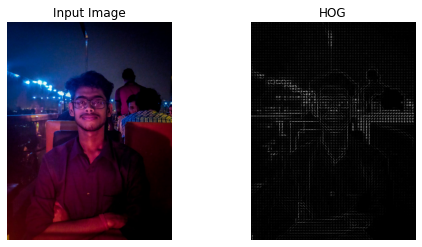

In [4]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2
image =cv2.imread('/content/gdrive/My Drive/IMG-20200229-WA0039.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True,multichannel=True)
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input Image')
hog_image__rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image__rescaled, cmap=plt.cm.gray)
ax2.set_title('HOG')
plt.show()

In [5]:
image.shape
len(fd)

38400

In [6]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [7]:
face_locations=face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print(number_of_faces)

1


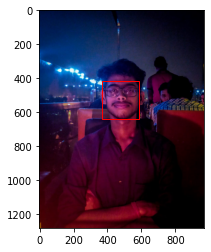

In [8]:
plt.imshow(image)
ax=plt.gca()

for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom
  rect= Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
  plt.show()

In [9]:
image =cv2.imread('/content/gdrive/My Drive/IMG-20200229-WA0039.jpg')
gaurav=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image =cv2.imread('/content/gdrive/My Drive/IMG-20200713-WA0031.jpg')
amitabh=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image =cv2.imread('/content/gdrive/My Drive/IMG_20200518_125713.jpg')
demo=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
face_demo_encoding=face_recognition.face_encodings(demo)[0]
gaurav_encoding=face_recognition.face_encodings(gaurav)[0]

amitabh_encoding=face_recognition.face_encodings(amitabh)[0]
known_face_encodings =[face_demo_encoding,gaurav_encoding,amitabh_encoding]

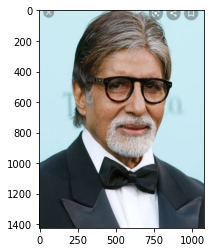

In [22]:
sample=cv2.imread('/content/drive/My Drive/IMG_20200814_184341.jpg')
sample=cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
plt.imshow(sample)
sample_encoding=face_recognition.face_encodings(sample)

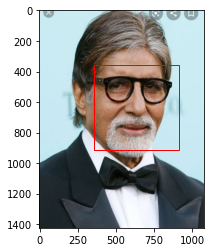

found amitabh in the photo!


In [23]:
face_locations=face_recognition.face_locations(sample)
number_of_faces = len(face_locations)

plt.imshow(sample)
ax=plt.gca()

for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom
  rect= Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
plt.show()
from scipy.spatial import distance
for unknown_face_encoding in sample_encoding:
     results = []
     for known_face_encoding in known_face_encodings:
        d = distance.euclidean(known_face_encoding, unknown_face_encoding)
        results.append(d)
     threshold=0.6
     results = np.array(results) <= threshold
     name = "unknown"
     if results[0]:
         name = "gaurav"
     elif results[1]:
         name = "demo"    
        
     elif results[2]:
         name = "amitabh"     
     print(f"found {name} in the photo!")


  